#Библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


#Исходные данные

In [28]:
# Загружаем данные
data = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64.00,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56.00,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.80,77.00,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.80,87.00,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.80,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,Female,1.71,131.41,Sometimes,yes,3,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,22,Female,1.75,133.74,Sometimes,yes,3,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,23,Female,1.75,133.69,Sometimes,yes,3,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,24,Female,1.74,133.35,Sometimes,yes,3,3,no,no,3,yes,1,1,Sometimes,Public_Transportation,Obesity_Type_III


#Обработка категориальных данных

In [29]:
# Преобразуем категориальные признаки в числовые
# Признак 'Gender' преобразуем вручную (Female -> 0, Male -> 1)
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

# Признаки типа "yes" и "no" преобразуем так же вручную в 1 и 0
binary_cols = ['SMOKE', 'family_history_with_overweight', 'SCC', 'FAVC']
for col in binary_cols:
    data[col] = data[col].apply(lambda x: 1 if x == 'yes' else 0)

In [4]:
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,0,1.62,64.00,no,0,2,3,0,0,2,1,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,0,1.52,56.00,Sometimes,0,3,3,1,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,1,1.80,77.00,Frequently,0,2,3,0,0,2,1,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,1,1.80,87.00,Frequently,0,3,3,0,0,2,0,2,0,Sometimes,Walking,Overweight_Level_I
4,22,1,1.78,89.80,Sometimes,0,2,1,0,0,2,0,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,0,1.71,131.41,Sometimes,1,3,3,0,0,2,1,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,22,0,1.75,133.74,Sometimes,1,3,3,0,0,2,1,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,23,0,1.75,133.69,Sometimes,1,3,3,0,0,2,1,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,24,0,1.74,133.35,Sometimes,1,3,3,0,0,3,1,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [37]:
# Применяем LabelEncoder к каждому категориальному признаку
cat_le_dict = {}
label_cols = ['CALC', 'CAEC', 'MTRANS']
for col in label_cols:
    cat_le_dict[col] = LabelEncoder()
    data[col] = cat_le_dict[col].fit_transform(data[col])

# Применяем LabelEncoder к целевой переменной (NObeyesdad)
target_le = LabelEncoder()
data['NObeyesdad'] = target_le.fit_transform(data['NObeyesdad'])


<ipython-input-37-75a750eea7e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = cat_le_dict[col].fit_transform(data[col])
<ipython-input-37-75a750eea7e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = cat_le_dict[col].fit_transform(data[col])
<ipython-input-37-75a750eea7e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [6]:
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,0,1.62,64.00,3,0,2,3,0,0,2,1,0,1,2,3,1
1,21,0,1.52,56.00,2,0,3,3,1,1,3,1,3,0,2,3,1
2,23,1,1.80,77.00,1,0,2,3,0,0,2,1,2,1,2,3,1
3,27,1,1.80,87.00,1,0,3,3,0,0,2,0,2,0,2,4,5
4,22,1,1.78,89.80,2,0,2,1,0,0,2,0,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,0,1.71,131.41,2,1,3,3,0,0,2,1,2,1,2,3,4
2107,22,0,1.75,133.74,2,1,3,3,0,0,2,1,1,1,2,3,4
2108,23,0,1.75,133.69,2,1,3,3,0,0,2,1,1,1,2,3,4
2109,24,0,1.74,133.35,2,1,3,3,0,0,3,1,1,1,2,3,4


In [7]:
# Сохраняем оба энкодера
joblib.dump(cat_le_dict, 'category_label_encoder.pkl')  # Сохраняем словарь энкодеров
joblib.dump(target_le, 'target_label_encoder.pkl')  # Сохраняем энкодер для целевой переменной



['target_label_encoder.pkl']

#Обработка числовых данных

In [8]:
# проверим минимальные и максимальные значения по числовым характеристикам
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
print(data[numerical_cols].min())
print(data[numerical_cols].max())


Age       14.00
Height     1.45
Weight    39.00
FCVC       1.00
NCP        1.00
CH2O       1.00
FAF        0.00
TUE        0.00
dtype: float64
Age            61.00
Height          1.98
Weight        173.00
FCVC      2839064.00
NCP       2939504.00
CH2O      2565465.00
FAF       1951524.00
TUE        880966.00
dtype: float64


Все минимальные значения соответствуют действительности. Мксимальные значения по возрасту, росту, весу так же реальны. Однако по другим характеристикам максимальные значения ошибочны, исправить эти выбросы не представляется возможным, поэтому необходимо их удалить

In [32]:
numerical_cols = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Установим границы для столбцов с ошибочными максимальными значениями
max_values = {
    'FCVC': 3.0,
    'NCP': 4.0,
    'CH2O': 3.0,
    'FAF': 3.0,
    'TUE': 2.0
}


In [33]:
# Идентифицируем строки с ошибочными значениями
excluded_data = pd.DataFrame()

for col in numerical_cols:
    temp_data = data[data[col] > max_values[col]]
    excluded_data = pd.concat([excluded_data, temp_data])

In [11]:
excluded_data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
546,19,0,1.66,49.84,2,1,1104861,3,0,0,1,0,2,1,2,3,0
595,17,1,1.82,58.33,3,1,1349969,4,0,0,2,1,2,0,2,0,0
671,22,0,1.71,51.71,3,1,2524955,3,0,0,1,1,2,0,1,3,0
864,23,1,1.71,75.38,2,1,1359101,3,0,0,1,1,0,1,2,3,5
926,21,0,1.76,79.47,2,1,2431453,1,0,0,3,1,3,1,2,3,5
1220,21,1,1.65,88.47,3,1,868215,1,0,0,3,1,1,1,2,3,2
1501,29,1,1.64,89.42,2,1,513898,3,0,0,2,1,0,0,2,0,2
1572,29,1,1.82,120.40,2,1,2839064,3,0,0,3,1,1,1,2,0,3
1638,32,1,1.75,120.10,2,1,2839064,3,0,0,3,1,1,1,2,0,3
1672,31,1,1.67,100.54,3,1,2795234,2,0,0,1,1,2,0,2,3,3


In [34]:
# Удаляем выбросы
data = data[~data.index.isin(excluded_data.index)]
print(data[numerical_cols].min())
print(data[numerical_cols].max())

FCVC    1
NCP     1
CH2O    1
FAF     0
TUE     0
dtype: int64
FCVC    3
NCP     4
CH2O    3
FAF     3
TUE     2
dtype: int64


In [38]:
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,0,1.62,64.00,3,0,2,3,0,0,2,1,0,1,2,3,1
1,21,0,1.52,56.00,2,0,3,3,1,1,3,1,3,0,2,3,1
2,23,1,1.80,77.00,1,0,2,3,0,0,2,1,2,1,2,3,1
3,27,1,1.80,87.00,1,0,3,3,0,0,2,0,2,0,2,4,5
4,22,1,1.78,89.80,2,0,2,1,0,0,2,0,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,0,1.71,131.41,2,1,3,3,0,0,2,1,2,1,2,3,4
2107,22,0,1.75,133.74,2,1,3,3,0,0,2,1,1,1,2,3,4
2108,23,0,1.75,133.69,2,1,3,3,0,0,2,1,1,1,2,3,4
2109,24,0,1.74,133.35,2,1,3,3,0,0,3,1,1,1,2,3,4


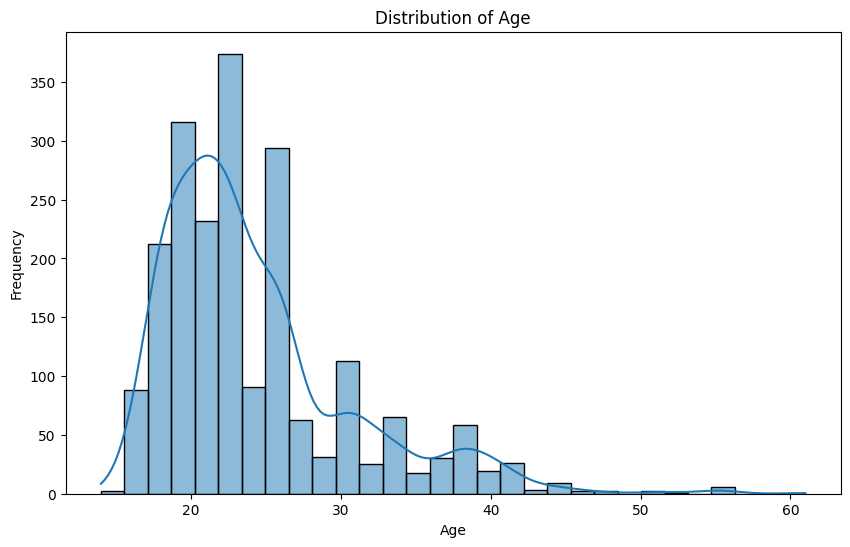

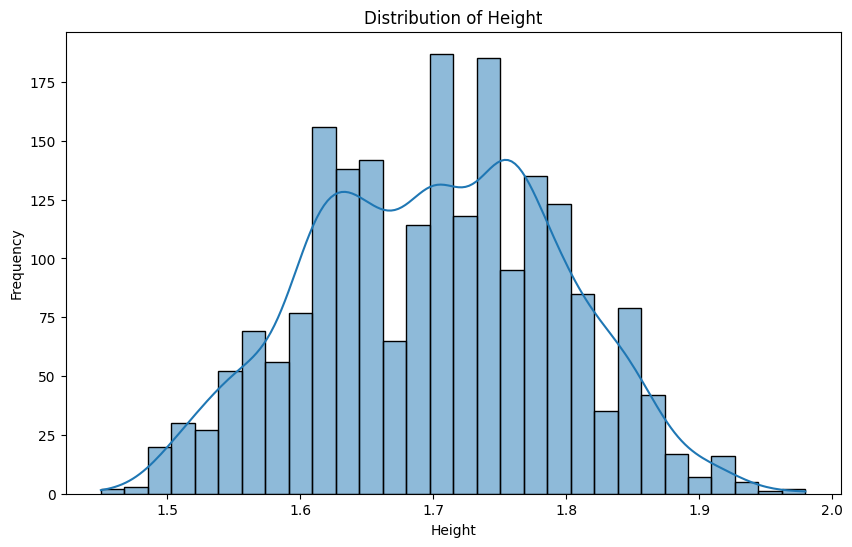

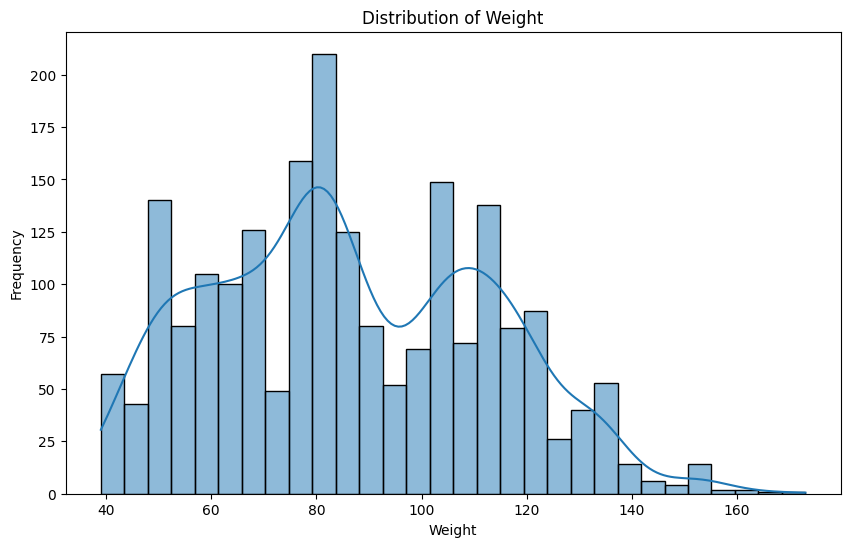

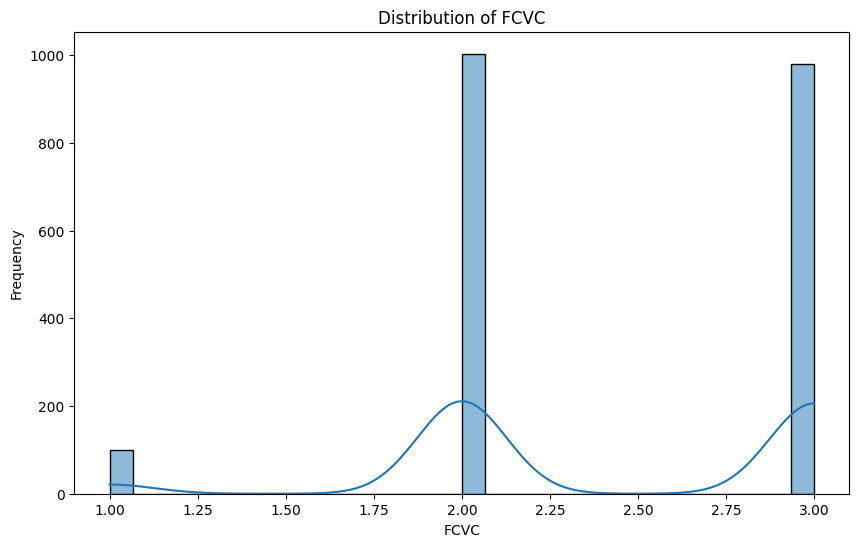

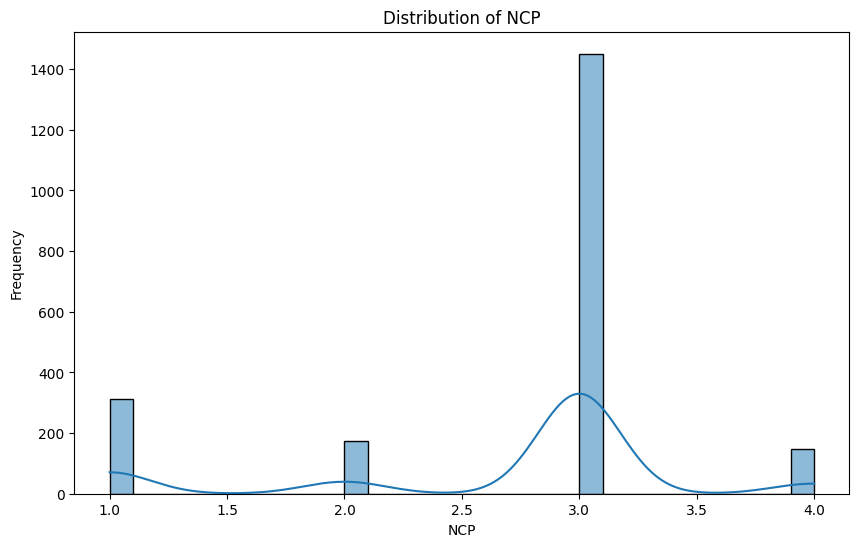

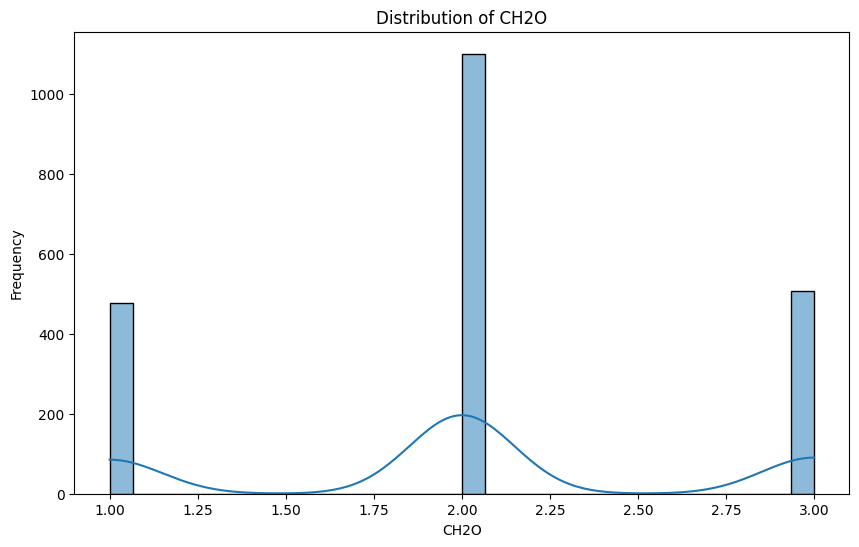

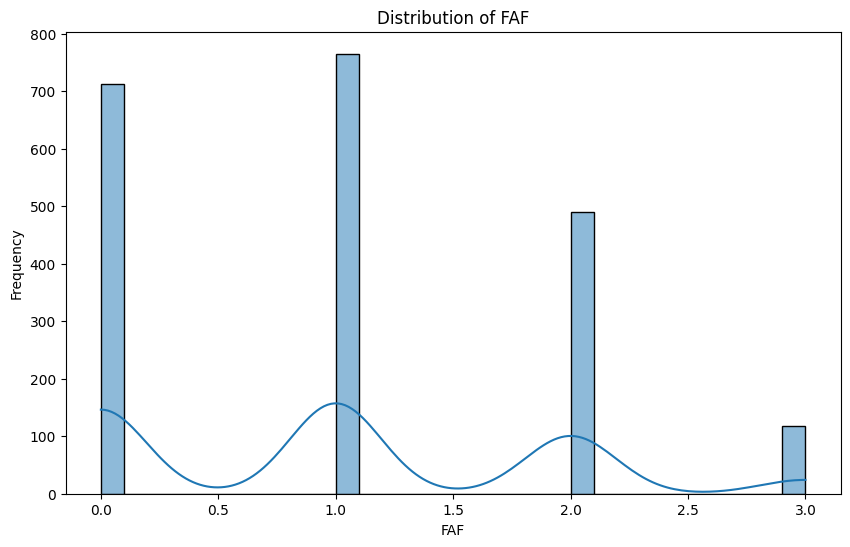

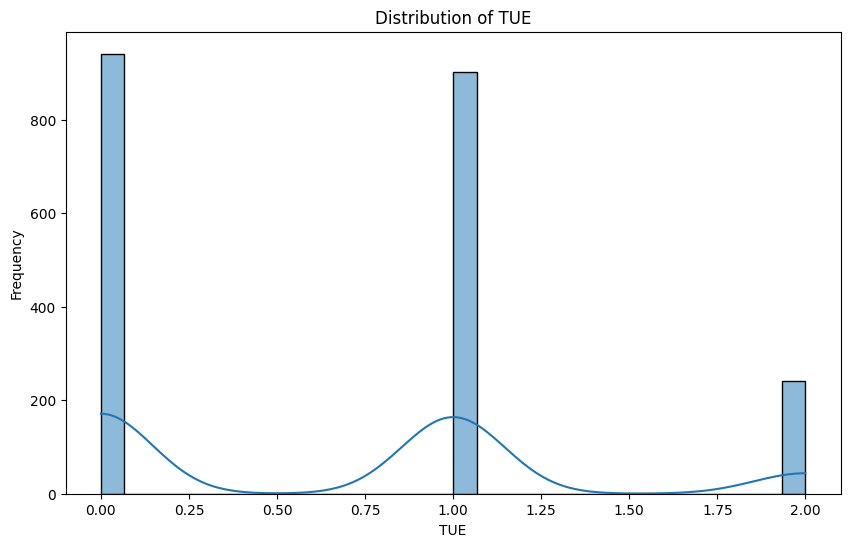

In [14]:
# Графики распределения признаков
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Нормализация для данного датасета не требуется

#RandomForest, LogisticRegression, SVC

In [35]:
# Разделение данных на признаки и целевую переменную
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [16]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-17-c958710e5dab>:13: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()  # Преобразуем y_train в одномерный массив
<ipython-input-17-c958710e5dab>:14: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()    # Преобразуем y_test в одномерный массив


Model: RandomForest
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.88      0.84      0.86        63
           2       0.99      0.96      0.97        70
           3       0.97      0.98      0.98        62
           4       1.00      0.98      0.99        54
           5       0.89      0.93      0.91        68
           6       0.94      0.96      0.95        50

    accuracy                           0.94       417
   macro avg       0.94      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417

Accuracy Score:
0.9424460431654677
Confusion Matrix:
[[48  2  0  0  0  0  0]
 [ 3 53  0  0  0  6  1]
 [ 0  0 67  1  0  1  1]
 [ 0  0  1 61  0  0  0]
 [ 0  0  0  1 53  0  0]
 [ 0  4  0  0  0 63  1]
 [ 0  1  0  0  0  1 48]]




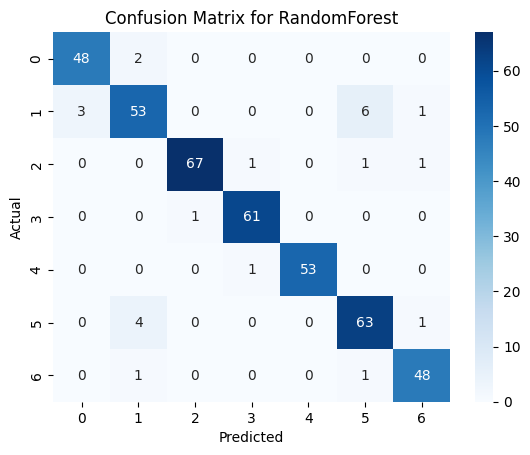

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        50
           1       0.66      0.56      0.60        63
           2       0.78      0.81      0.80        70
           3       0.91      0.98      0.95        62
           4       0.93      0.98      0.95        54
           5       0.70      0.59      0.64        68
           6       0.55      0.62      0.58        50

    accuracy                           0.76       417
   macro avg       0.76      0.77      0.76       417
weighted avg       0.76      0.76      0.76       417

Accuracy Score:
0.7649880095923262
Confusion Matrix:
[[42  8  0  0  0  0  0]
 [12 35  0  0  0 12  4]
 [ 0  0 57  5  3  0  5]
 [ 0  0  1 61  0  0  0]
 [ 0  0  0  1 53  0  0]
 [ 0  7  4  0  1 40 16]
 [ 0  3 11  0  0  5 31]]




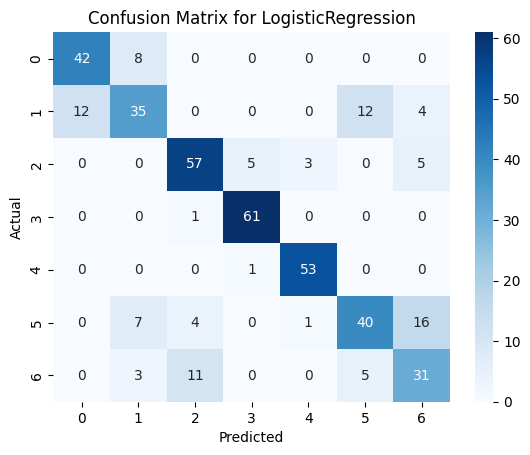

Model: SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.96      0.80        50
           1       0.54      0.33      0.41        63
           2       0.50      0.29      0.36        70
           3       0.78      0.40      0.53        62
           4       0.55      1.00      0.71        54
           5       0.57      0.51      0.54        68
           6       0.34      0.52      0.41        50

    accuracy                           0.55       417
   macro avg       0.57      0.57      0.54       417
weighted avg       0.57      0.55      0.53       417

Accuracy Score:
0.5491606714628298
Confusion Matrix:
[[48  2  0  0  0  0  0]
 [20 21  0  0  0 18  4]
 [ 0  0 20  7 14  0 29]
 [ 0  0  6 25 31  0  0]
 [ 0  0  0  0 54  0  0]
 [ 2 10  4  0  0 35 17]
 [ 0  6 10  0  0  8 26]]




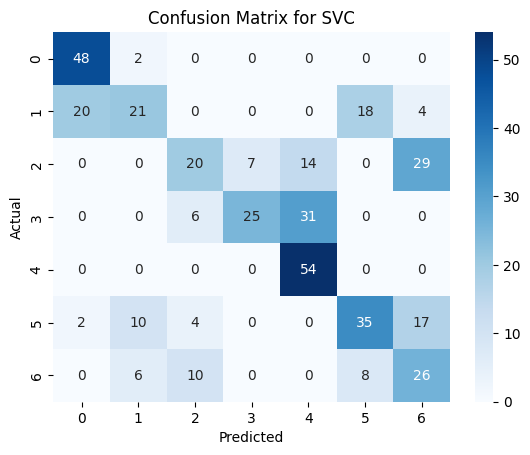

In [17]:
# Обучение моделей
# Обучение моделей
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs'),  # Устанавливаем solver для стабильности
    'SVC': SVC(random_state=42)
}

# Словарь для хранения обученных моделей
trained_models = {}

# Убедимся, что y_train и y_test являются одномерными массивами
y_train = y_train.ravel()  # Преобразуем y_train в одномерный массив
y_test = y_test.ravel()    # Преобразуем y_test в одномерный массив

for name, model in models.items():
    model.fit(X_train, y_train)  # Обучаем модель
    y_pred = model.predict(X_test)  # Прогнозируем результаты

    print(f"Model: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    # Визуализация матрицы ошибок
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Сохранение обученной модели в словарь
    trained_models[name] = model


Accuracy (Точность) - доля правильно предсказанных примеров от общего числа примеров.

Precision (Точность) - доля правильно предсказанных положительных примеров от общего числа предсказанных положительных примеров.

Recall (Полнота) - lоля правильно предсказанных положительных примеров от общего числа действительных положительных примеров.

F1-score - гармоническое среднее между precision и recall. F1-score является хорошей метрикой для оценки моделей, особенно при несбалансированных классах.

RandomForest:
Accuracy: 0.942
Macro F1-score: 0.94
Weighted F1-score: 0.94

SVC:
Accuracy: 0.549
Macro F1-score: 0.54
Weighted F1-score: 0.53

LogisticRegression:
Accuracy: 0.765
Macro F1-score: 0.76
Weighted F1-score: 0.76

Наилучшая модель - RandomForest

In [18]:
# Сохранение модели
joblib.dump(trained_models['RandomForest'], 'random_forest_model.pkl')

['random_forest_model.pkl']

#Дерево решений

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        50
           1       0.86      0.87      0.87        63
           2       0.97      0.93      0.95        70
           3       0.92      0.97      0.94        62
           4       1.00      0.98      0.99        54
           5       0.97      0.88      0.92        68
           6       0.96      1.00      0.98        50

    accuracy                           0.94       417
   macro avg       0.94      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417

Accuracy Score:
0.9376498800959233
Confusion Matrix:
[[48  2  0  0  0  0  0]
 [ 6 55  0  0  0  2  0]
 [ 0  1 65  4  0  0  0]
 [ 0  0  2 60  0  0  0]
 [ 0  0  0  1 53  0  0]
 [ 0  6  0  0  0 60  2]
 [ 0  0  0  0  0  0 50]]


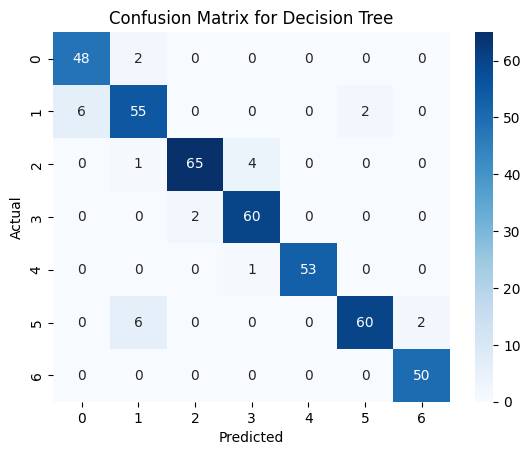

In [45]:
from sklearn.tree import DecisionTreeClassifier
import os

# Обучение модели дерева решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Прогнозирование результатов
y_pred = model.predict(X_test)

# Оценка модели
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Визуализация матрицы ошибок
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Сохранение структуры дерева в текстовый файл
feature_names = X.columns
class_names = model.classes_

# Создание директории для сохранения модели, если она не существует
os.makedirs('training_models', exist_ok=True)

with open('training_models/tree_structure.txt', 'w') as f:
    f.write(f"Number of nodes: {model.tree_.node_count}\n")
    f.write(f"Number of features: {model.tree_.n_features}\n")
    f.write(f"Number of classes: {model.tree_.n_classes}\n")
    f.write(f"Feature names: {', '.join(feature_names)}\n")
    f.write(f"Class names: {', '.join(map(str, class_names))}\n")
    f.write("\nNodes:\n")

    for i in range(model.tree_.node_count):
        f.write(f"Node {i}:\n")
        f.write(f"  Feature: {feature_names[model.tree_.feature[i]] if model.tree_.feature[i] != -2 else 'Leaf'}\n")
        f.write(f"  Threshold: {model.tree_.threshold[i]}\n")
        f.write(f"  Impurity: {model.tree_.impurity[i]}\n")
        f.write(f"  Number of samples: {model.tree_.n_node_samples[i]}\n")
        f.write(f"  Weighted number of samples: {model.tree_.weighted_n_node_samples[i]}\n")
        f.write(f"  Left child: {model.tree_.children_left[i]}\n")
        f.write(f"  Right child: {model.tree_.children_right[i]}\n")
        f.write(f"  Value: {model.tree_.value[i].tolist()}\n")
        f.write("\n")


#Keras

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1843 - loss: 5.3363 - val_accuracy: 0.2395 - val_loss: 1.7664
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3066 - loss: 1.6603 - val_accuracy: 0.3802 - val_loss: 1.5184
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3712 - loss: 1.5607 - val_accuracy: 0.3802 - val_loss: 1.4962
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3945 - loss: 1.4566 - val_accuracy: 0.3743 - val_loss: 1.3810
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4575 - loss: 1.3329 - val_accuracy: 0.4940 - val_loss: 1.2547
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4432 - loss: 1.3252 - val_accuracy: 0.5030 - val_loss: 1.2410
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4853 - loss: 1.2291 - val_accuracy: 0.5030 - val_loss: 1.1602
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5219 - loss: 1.1722 - val_accuracy: 0.5419 - val_loss

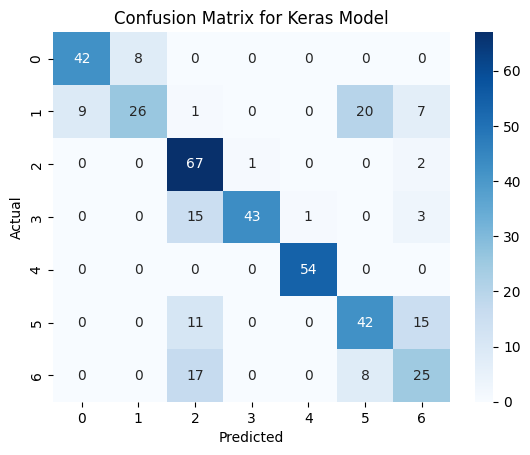

In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Построение модели
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 классов (0-6)

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Оценка модели
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Визуализация матрицы ошибок
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Keras Model')
plt.show()


#XGBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        50
           1       0.98      0.89      0.93        63
           2       0.99      0.97      0.98        70
           3       0.97      0.98      0.98        62
           4       1.00      0.98      0.99        54
           5       0.97      0.97      0.97        68
           6       0.98      1.00      0.99        50

    accuracy                           0.97       417
   macro avg       0.97      0.97      0.97       417
weighted avg       0.97      0.97      0.97       417

Accuracy Score:
0.9688249400479616
Confusion Matrix:
[[50  0  0  0  0  0  0]
 [ 6 56  0  0  0  1  0]
 [ 0  0 68  1  0  1  0]
 [ 0  0  1 61  0  0  0]
 [ 0  0  0  1 53  0  0]
 [ 0  1  0  0  0 66  1]
 [ 0  0  0  0  0  0 50]]


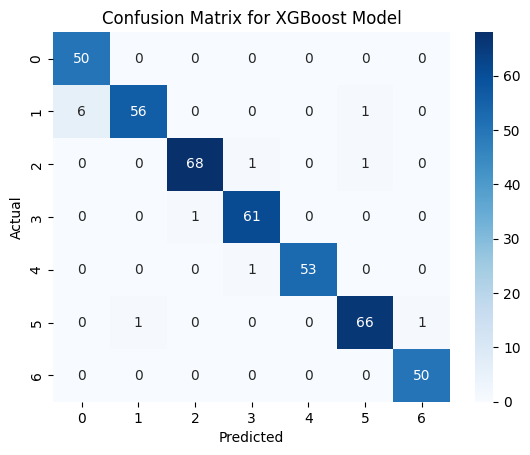

In [22]:
import xgboost as xgb

# Построение модели XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Оценка модели
y_pred = xgb_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Визуализация матрицы ошибок
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


In [25]:
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

#CatBoost

In [24]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.97      0.92      0.94        63
           2       0.97      0.99      0.98        70
           3       0.97      0.98      0.98        62
           4       1.00      0.98      0.99        54
           5       0.94      0.99      0.96        68
           6       1.00      0.98      0.99        50

    accuracy                           0.97       417
   macro avg       0.98      0.97      0.97       417
weighted avg       0.97      0.97      0.97       417

Accuracy Score:
0.973621103117506
Confusion Matrix:
[[49  1  0  0  0  0  0]
 [ 1 58  0  0  0  4  0]
 [ 0  0 69  1  0  0  0]
 [ 0  0  1 61  0  0  0]
 [ 0  0  0  1 53  0  0]
 [ 0  1  0  0  0 67  0]
 [ 0  0  1  0  0  0 49]]


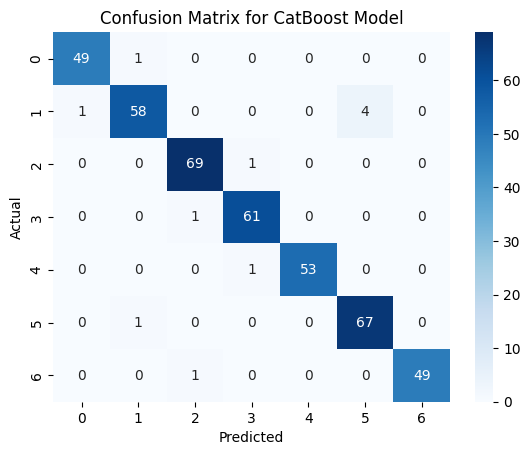

In [26]:
from catboost import CatBoostClassifier

# Построение модели CatBoost
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Оценка модели
y_pred = catboost_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Визуализация матрицы ошибок
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CatBoost Model')
plt.show()


In [27]:
catboost_model.save_model('catboost_model.cbm')